In [1]:
from Turtlebot_Kinematics import unicycleKin, difDriveKin, unicycleAcceleration
from dwa_controller import DWA_Controller
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from environment import Environment
from shapely.plotting import plot_polygon

sum: -170.0446211850622 -72.50181740476714 (0.5526315789473681, -0.06631578947368422)
dist: -142.49010271004508 -103.5682719036304 (-1.5, 0.16105263157894734)
head: -44.99416820658959 44.99416820658959 (0.5526315789473681, -0.18)
speed: 0.1578947368421004 15.0 (-1.5, -0.1231578947368421)


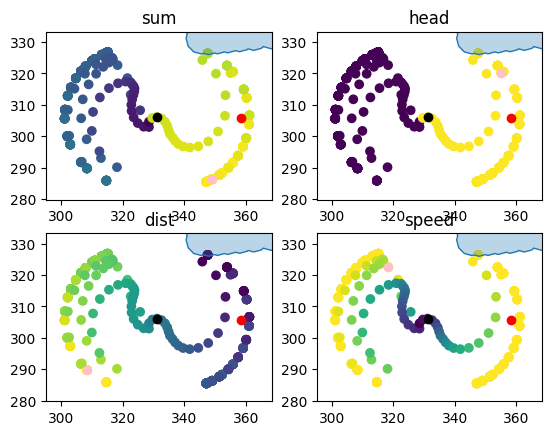

In [2]:
fig, axs = plt.subplots(2,2)

kin = unicycleAcceleration()
v_pairs = list(kin.v_gen(20))
#env = Environment.from_json_file("./levels/2024_6_13_13_35_33_3_165_1.json", kin)
env = Environment.from_json_file("./levels/2024_6_13_14_53_15_3_165_1.json", kin)
#env = Environment.from_json_file("./levels/2024_6_13_16_1_34_3_165_1.json", kin)
#env = Environment.from_json_file("./levels/2024_6_13_16_17_55_3_165_1.json", kin)
sensor_fusion = env.get_sensor_fusion(point_cloud=False)
robo_state = env.get_internal_state()
goal_pos = env.get_goal_pos(dt=2.0)

ctrl = DWA_Controller(20, kin, 2.0)
xs = []
ys = []
fits = []
dists = []
heads = []
speeds = []
cmap = mpl.colormaps["viridis"]
for v, w in v_pairs:
    end_state = kin(robo_state, v, w, 2.0)
    dist, head, speed = ctrl.fitness(env, robo_state, v, w, 2.0, sensor_fusion)
    if dist == - np.inf: 
        dist = ctrl.dist_koeff
    xs.append(end_state[0])
    ys.append(end_state[1])
    fits.append(dist + speed + head)
    dists.append(dist)
    heads.append(head)
    speeds.append(speed)
    
axs[0,0].scatter(xs, ys, c=cmap((np.array(fits)-min(fits)) / (max(fits)-min(fits)) ))
axs[0,0].scatter(xs[np.argmax(fits)], ys[np.argmax(fits)], c="pink")
axs[0,0].set_title("sum")
print("sum:", min(fits), max(fits), v_pairs[np.argmax(fits)])

dist_cs = cmap((np.array(dists)-min(dists)) / (max(dists)-min(dists))) if max(dists) > min(dists) else [cmap(0.5)]*len(dists)
axs[1,0].scatter(xs, ys, c=dist_cs)
axs[1,0].scatter(xs[np.argmax(dists)], ys[np.argmax(dists)], c="pink")
axs[1,0].set_title("dist")
print("dist:", min(dists), max(dists), v_pairs[np.argmax(dists)])

axs[0,1].scatter(xs, ys, c=cmap((np.array(heads)-min(heads)) / (max(heads)-min(heads)) ))
axs[0,1].scatter(xs[np.argmax(heads)], ys[np.argmax(heads)], c="pink")
axs[0,1].set_title("head")
print("head:", min(heads), max(heads), v_pairs[np.argmax(heads)])

axs[1,1].scatter(xs, ys, c=cmap((np.array(speeds)-min(speeds)) / (max(speeds)-min(speeds)) ))
axs[1,1].scatter(xs[np.argmax(speeds)], ys[np.argmax(speeds)], c="pink")
axs[1,1].set_title("speed")
print("speed:", min(speeds), max(speeds), v_pairs[np.argmax(speeds)])

x_lim = min(min(xs), goal_pos[0]) * 0.98, max(max(xs), goal_pos[0]) * 1.02
y_lim = min(min(ys), goal_pos[1]) * 0.98, max(max(ys), goal_pos[1]) * 1.02


for ax_col in axs:
    for ax in ax_col:
        plot_polygon(sensor_fusion, ax=ax, add_points=False)
        ax.scatter([robo_state[0]], [robo_state[1]], c=["black"])
        ax.scatter([goal_pos[0]], goal_pos[1], color="red")
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)


In [3]:
a = np.array([0,2])
b = np.array([0,1])
a @ b

2

In [4]:
_, head1, _ = ctrl.fitness(env, robo_state, 15, -0.9, 2.0, sensor_fusion)
print(head1, "\n")
_, head2, _ = ctrl.fitness(env, robo_state, 15, 0.9, 2.0, sensor_fusion)
print(head2)

44.272966175465406 

44.272966175465484


In [5]:
cmap(0.1)

(0.282623, 0.140926, 0.457517, 1.0)